# Libraries

In [102]:
import pandas as pd
import numpy as np

from nba_api.stats.endpoints import playbyplay
from nba_api.stats.endpoints import shotchartdetail
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.static import players
from nba_api.stats.static import teams

In [39]:
df_teams = pd.DataFrame(teams.get_teams())
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [3]:
nba_players = players.get_players()

In [38]:
df_players = pd.DataFrame(nba_players)
df_players.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [5]:

df_players[df_players['full_name'] == 'Klay Thompson']

,id,full_name,first_name,last_name,is_active
4160,202691,Klay Thompson,Klay,Thompson,True


In [54]:
player_id = 0
team_id = 0
season = '2021-22'

In [55]:
df = shotchartdetail.ShotChartDetail(team_id,player_id).get_data_frames()[0]

In [ ]:
# # Get player shooting from 10+ feet
# results = [
#     endpoints.playerdashptshots.PlayerDashPtShots(team_id=0, player_id=0, season=season).get_data_frames()[5]
#     for season in seasons
# ]

# active_players = [
#     f"{player['last_name']}, {player['first_name']}" for player in all_players if player['is_active'] == True
# ]


In [59]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020000001,20,689,Theo Ratliff,1610612755,Philadelphia 76ers,1,10,8,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20001031,NYK,PHI
1,Shot Chart Detail,0020000001,21,275,Allan Houston,1610612752,New York Knicks,1,9,50,...,Right Side(R),8-16 ft.,15,157,23,1,1,20001031,NYK,PHI
2,Shot Chart Detail,0020000001,27,689,Theo Ratliff,1610612755,Philadelphia 76ers,1,8,56,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20001031,NYK,PHI
3,Shot Chart Detail,0020000001,30,727,Eric Snow,1610612755,Philadelphia 76ers,1,8,31,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20001031,NYK,PHI
4,Shot Chart Detail,0020000001,31,275,Allan Houston,1610612752,New York Knicks,1,8,16,...,Right Side(R),24+ ft.,24,228,78,1,1,20001031,NYK,PHI


In [58]:
df.SHOT_TYPE.value_counts()

2PT Field Goal    1844618
3PT Field Goal     449035
Name: SHOT_TYPE, dtype: int64

In [60]:
df3pt = df[df.SHOT_TYPE == '3PT Field Goal']

<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

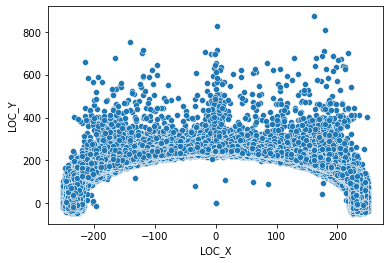

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = df3pt, x = 'LOC_X', y='LOC_Y')

----

In [62]:
import requests
from bs4 import BeautifulSoup as bs

In [63]:
url = 'https://www.nba.com/stats/events/?flag=3&CFID=33&CFPARAMS=2021-22&PlayerID=202691&ContextMeasure=FGA&Season=2021-22&section=player&sct=plot&CF=SHOT_TYPE*E*3PT%20Field%20Goal'

In [64]:
r = requests.get(url)

In [65]:
soup = bs(r.content)

In [66]:
soup.find_all('div')

[<div class="nba-nav-placeholder" id="nba-nav"></div>,
 <div class="nav-container" ng-cloak="" ng-controller="StatsHeaderController" stats-fixed-nav="">
 <div class="nav-wrapper shadow-md">
 <div class="nav-inner">
 <!-- left: inner nav -->
 <div class="nav-inner__title">Stats</div>
 <div class="nav-inner__divider"></div>
 <nav class="nav-inner__menu" role="navigation">
 <div class="nav-inner__menu-item">
 <a class="nav-inner__btn" href="/stats/" ng-class="{ active: activeTab=='home' }">Home</a>
 </div>
 <div class="nav-inner__menu-item nav-inner__btn-players">
 <button aria-expanded="{{isPlayersOpen}}" aria-haspopup="true" class="nav-inner__btn" ng-class="{ active: activeTab=='players' }" ng-click="togglePlayers()">
             Players
             <svg class="arrow" height="7" ng-class="{ open: isPlayersOpen }" viewbox="0 0 11 7" width="11" xmlns="http://www.w3.org/2000/svg">
 <path d="M110 4L114 8 110 12" fill="none" stroke="#999" stroke-width="2" transform="rotate(90 61.25 -47.75)

---

In [67]:
df_3pt = shotchartdetail.ShotChartDetail(team_id = int(team_id),
                                     player_id = int(player_id),
                                     season_type_all_star='Regular Season',
                                     season_nullable='2021-22',
                                     context_measure_simple = 'FG3A').get_data_frames()

In [94]:
df_3pt[0].head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100001,7,1628960,Grayson Allen,1610612749,Milwaukee Bucks,1,11,42,...,Left Side Center(LC),24+ ft.,26,-164,210,1,0,20211019,MIL,BKN
1,Shot Chart Detail,0022100001,15,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,13,...,Center(C),24+ ft.,26,0,263,1,0,20211019,MIL,BKN
2,Shot Chart Detail,0022100001,25,201935,James Harden,1610612751,Brooklyn Nets,1,10,16,...,Left Side Center(LC),24+ ft.,27,-213,172,1,0,20211019,MIL,BKN
3,Shot Chart Detail,0022100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,3,...,Center(C),24+ ft.,28,23,282,1,1,20211019,MIL,BKN
4,Shot Chart Detail,0022100001,43,203114,Khris Middleton,1610612749,Milwaukee Bucks,1,8,52,...,Center(C),24+ ft.,26,-54,261,1,1,20211019,MIL,BKN


In [69]:
from nba_api.stats.endpoints import leaguegamefinder

In [70]:
df_teams = leaguegamefinder.LeagueGameFinder(league_id_nullable = '00',
                                            season_nullable = '2021-22').get_data_frames()

In [71]:
df_season = df_teams[0]

In [73]:
df_season[df_season.SEASON_ID == '32021']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
880,32021,1610616833,DRT,Team Durant,0032100001,2022-02-20,DRT @ LBN,L,241,160,...,1.000,13,37,50,41,11,1,14,2,-3.0
881,32021,1610616834,LBN,Team LeBron,0032100001,2022-02-20,LBN vs. DRT,W,240,163,...,1.000,13,35,48,40,13,6,16,6,3.0
882,32021,1610616847,BAR,Team Barry,0032100006,2022-02-18,BAR @ IAH,W,5,25,...,0.750,1,9,10,9,2,3,4,3,5.0
883,32021,1610616849,IAH,Team Isiah,0032100006,2022-02-18,IAH vs. BAR,L,5,20,...,0.667,5,7,12,5,2,2,3,4,-5.0
884,32021,1610616850,WOR,Team Worthy,0032100004,2022-02-18,WOR @ IAH,L,5,49,...,0.250,5,10,15,12,3,1,5,4,-1.0
885,32021,1610616849,IAH,Team Isiah,0032100004,2022-02-18,IAH vs. WOR,W,5,50,...,1.000,5,13,18,15,5,1,4,3,1.0
886,32021,1610616839,NIQ,Team Nique,0032100003,2022-02-18,NIQ vs. WAL,L,240,51,...,0.467,12,16,28,13,18,6,12,8,-14.0
887,32021,1610616840,WAL,Team Walton,0032100003,2022-02-18,WAL @ NIQ,W,240,65,...,0.375,29,34,63,13,7,7,24,13,14.0
888,32021,1610616848,PAY,Team Payton,0032100005,2022-02-18,PAY @ BAR,L,5,48,...,0.500,5,8,13,8,5,1,3,7,-2.0
889,32021,1610616847,BAR,Team Barry,0032100005,2022-02-18,BAR vs. PAY,W,5,50,...,0.556,9,16,25,10,2,5,9,3,2.0


In [72]:
df_main_season = df_season[df_season.SEASON_ID == '22021'].sort_values(by='GAME_DATE')

In [76]:
df_3pt[0].SHOT_DISTANCE.mean()

25.186514127231757

# Play by Play 

Can estimate shot clock time by analyzizng changes in the clock

In [42]:
df_main_season.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2655,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,0.833,9,41,50,30,9,2,17,18,7.0
2652,22021,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,...,0.565,5,39,44,19,3,9,12,17,-23.0
2654,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,241,114,...,0.474,5,40,45,21,7,4,17,25,-7.0
2653,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,239,127,...,0.778,13,41,54,25,8,9,7,19,23.0
2630,22021,1610612754,IND,Indiana Pacers,0022100003,2021-10-20,IND @ CHA,L,240,122,...,0.875,8,43,51,29,2,10,16,24,-1.0


In [77]:
df_main_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 2655 to 186
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          2460 non-null   object 
 1   TEAM_ID            2460 non-null   int64  
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_NAME          2460 non-null   object 
 4   GAME_ID            2460 non-null   object 
 5   GAME_DATE          2460 non-null   object 
 6   MATCHUP            2460 non-null   object 
 7   WL                 2460 non-null   object 
 8   MIN                2460 non-null   int64  
 9   PTS                2460 non-null   int64  
 10  FGM                2460 non-null   int64  
 11  FGA                2460 non-null   int64  
 12  FG_PCT             2460 non-null   float64
 13  FG3M               2460 non-null   int64  
 14  FG3A               2460 non-null   int64  
 15  FG3_PCT            2460 non-null   float64
 16  FTM                246

### average 3 pointers made

In [78]:
average_3pt_fg_made = df_main_season.FG3M.mean()

In [79]:
average_3pt_fg_made

12.43821138211382

array([[<AxesSubplot:title={'center':'FG3A'}>,
        <AxesSubplot:title={'center':'PTS'}>],
       [<AxesSubplot:title={'center':'FG3_PCT'}>, <AxesSubplot:>]],
      dtype=object)

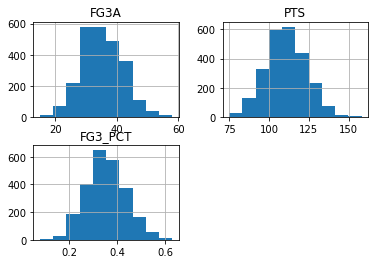

In [48]:
df_main_season[["FG3A","PTS","FG3_PCT"]].hist()

In [80]:
df_3pt[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86535 entries, 0 to 86534
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            86535 non-null  object
 1   GAME_ID              86535 non-null  object
 2   GAME_EVENT_ID        86535 non-null  int64 
 3   PLAYER_ID            86535 non-null  int64 
 4   PLAYER_NAME          86535 non-null  object
 5   TEAM_ID              86535 non-null  int64 
 6   TEAM_NAME            86535 non-null  object
 7   PERIOD               86535 non-null  int64 
 8   MINUTES_REMAINING    86535 non-null  int64 
 9   SECONDS_REMAINING    86535 non-null  int64 
 10  EVENT_TYPE           86535 non-null  object
 11  ACTION_TYPE          86535 non-null  object
 12  SHOT_TYPE            86535 non-null  object
 13  SHOT_ZONE_BASIC      86535 non-null  object
 14  SHOT_ZONE_AREA       86535 non-null  object
 15  SHOT_ZONE_RANGE      86535 non-null  object
 16  SHOT

<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

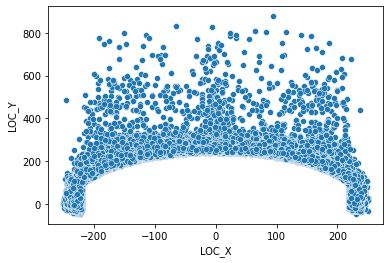

In [100]:
main_df = pd.merge(df_main_season, df_3pt[0], on = "GAME_ID", how = "left")

In [101]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173070 entries, 0 to 173069
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SEASON_ID            173070 non-null  object 
 1   TEAM_ID_x            173070 non-null  int64  
 2   TEAM_ABBREVIATION    173070 non-null  object 
 3   TEAM_NAME_x          173070 non-null  object 
 4   GAME_ID              173070 non-null  object 
 5   GAME_DATE_x          173070 non-null  object 
 6   MATCHUP              173070 non-null  object 
 7   WL                   173070 non-null  object 
 8   MIN                  173070 non-null  int64  
 9   PTS                  173070 non-null  int64  
 10  FGM                  173070 non-null  int64  
 11  FGA                  173070 non-null  int64  
 12  FG_PCT               173070 non-null  float64
 13  FG3M                 173070 non-null  int64  
 14  FG3A                 173070 non-null  int64  
 15  FG3_PCT          

In [106]:
main_df.head()

,SEASON_ID,TEAM_ID_x,TEAM_ABBREVIATION,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP,WL,MIN,PTS,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE_y,HTM,VTM
0,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,Right Side Center(RC),24+ ft.,27,126,240,1,0,20211019,LAL,GSW
1,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,Center(C),24+ ft.,27,62,269,1,0,20211019,LAL,GSW
2,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,Left Side(L),24+ ft.,22,-227,-1,1,0,20211019,LAL,GSW
3,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,Left Side Center(LC),24+ ft.,28,-109,260,1,0,20211019,LAL,GSW
4,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,Left Side(L),24+ ft.,23,-233,6,1,0,20211019,LAL,GSW


<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

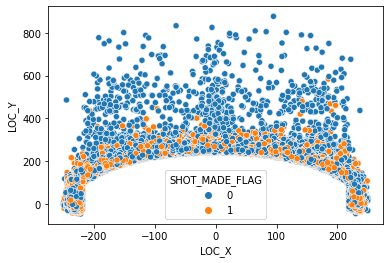

In [119]:
 
sns.scatterplot(data = main_df, x = 'LOC_X', y='LOC_Y', hue = main_df.SHOT_MADE_FLAG )

In [132]:
columns_to_drop = ["SEASON_ID", "TEAM_ABBREVIATION","OREB","DREB","REB","AST","STL","BLK","TOV","PF","PLUS_MINUS","GAME_DATE_y"]

In [137]:
# drop columns
main_df = main_df.drop(columns = columns_to_drop)

In [138]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173070 entries, 0 to 173069
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TEAM_ID_x            173070 non-null  int64  
 1   TEAM_NAME_x          173070 non-null  object 
 2   GAME_ID              173070 non-null  object 
 3   GAME_DATE_x          173070 non-null  object 
 4   MATCHUP              173070 non-null  object 
 5   WL                   173070 non-null  object 
 6   MIN                  173070 non-null  int64  
 7   PTS                  173070 non-null  int64  
 8   FGM                  173070 non-null  int64  
 9   FGA                  173070 non-null  int64  
 10  FG_PCT               173070 non-null  float64
 11  FG3M                 173070 non-null  int64  
 12  FG3A                 173070 non-null  int64  
 13  FG3_PCT              173070 non-null  float64
 14  FTM                  173070 non-null  int64  
 15  FTA              

In [139]:
main_df.head()

,TEAM_ID_x,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP,WL,MIN,PTS,FGM,FGA,...,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,HTM,VTM
0,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Above the Break 3,Right Side Center(RC),24+ ft.,27,126,240,1,0,LAL,GSW
1,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Above the Break 3,Center(C),24+ ft.,27,62,269,1,0,LAL,GSW
2,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Left Corner 3,Left Side(L),24+ ft.,22,-227,-1,1,0,LAL,GSW
3,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Above the Break 3,Left Side Center(LC),24+ ft.,28,-109,260,1,0,LAL,GSW
4,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Left Corner 3,Left Side(L),24+ ft.,23,-233,6,1,0,LAL,GSW


### seperate the df into winning and losing teams

In [150]:
df_wl = main_df.groupby(["WL"])

In [151]:
df_wl.head()

,TEAM_ID_x,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP,WL,MIN,PTS,FGM,FGA,...,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,HTM,VTM
0,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Above the Break 3,Right Side Center(RC),24+ ft.,27,126,240,1,0,LAL,GSW
1,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Above the Break 3,Center(C),24+ ft.,27,62,269,1,0,LAL,GSW
2,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Left Corner 3,Left Side(L),24+ ft.,22,-227,-1,1,0,LAL,GSW
3,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Above the Break 3,Left Side Center(LC),24+ ft.,28,-109,260,1,0,LAL,GSW
4,1610612744,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,41,93,...,Left Corner 3,Left Side(L),24+ ft.,23,-233,6,1,0,LAL,GSW
81,1610612751,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,37,84,...,Above the Break 3,Left Side Center(LC),24+ ft.,26,-164,210,1,0,MIL,BKN
82,1610612751,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,37,84,...,Above the Break 3,Center(C),24+ ft.,26,0,263,1,0,MIL,BKN
83,1610612751,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,37,84,...,Above the Break 3,Left Side Center(LC),24+ ft.,27,-213,172,1,0,MIL,BKN
84,1610612751,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,37,84,...,Above the Break 3,Center(C),24+ ft.,28,23,282,1,1,MIL,BKN
85,1610612751,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,241,104,37,84,...,Above the Break 3,Center(C),24+ ft.,26,-54,261,1,1,MIL,BKN


In [153]:
win_df = df_wl.get_group('W')
loss_df = df_wl.get_group('L')

In [154]:
win_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86535 entries, 0 to 173069
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TEAM_ID_x            86535 non-null  int64  
 1   TEAM_NAME_x          86535 non-null  object 
 2   GAME_ID              86535 non-null  object 
 3   GAME_DATE_x          86535 non-null  object 
 4   MATCHUP              86535 non-null  object 
 5   WL                   86535 non-null  object 
 6   MIN                  86535 non-null  int64  
 7   PTS                  86535 non-null  int64  
 8   FGM                  86535 non-null  int64  
 9   FGA                  86535 non-null  int64  
 10  FG_PCT               86535 non-null  float64
 11  FG3M                 86535 non-null  int64  
 12  FG3A                 86535 non-null  int64  
 13  FG3_PCT              86535 non-null  float64
 14  FTM                  86535 non-null  int64  
 15  FTA                  86535 non-null

In [155]:
# winning teams average 3pt attempts
win_df.FG3A.mean()

35.632368405847345

In [156]:
# losing teams average 3pt attempts
loss_df.FG3A.mean()

36.15829433177327

In [157]:
### attempts made are almost the same

In [158]:
win_df.FG3M.mean()

13.768128502917895

In [159]:
loss_df.FG3M.mean()

11.64021494193101

In [160]:
win_df.ACTION_TYPE.value_counts()

Jump Shot                             64320
Pullup Jump shot                      10975
Step Back Jump shot                    6325
Running Jump Shot                      2738
Running Pull-Up Jump Shot              1484
Fadeaway Jump Shot                      290
Jump Bank Shot                          183
Turnaround Jump Shot                     91
Turnaround Fadeaway shot                 32
Step Back Bank Jump Shot                 29
Driving Floating Jump Shot               22
Floating Jump shot                       22
Driving Floating Bank Jump Shot          14
Turnaround Fadeaway Bank Jump Shot       10
Name: ACTION_TYPE, dtype: int64